In [1]:
%%time
import dill
dill.load_session('Twitter Racism_3 label.db')

CPU times: user 4.24 s, sys: 1.68 s, total: 5.92 s
Wall time: 27.6 s


In [1]:
%%time
import pandas as pd
import numpy as np
import re
import nltk

CPU times: user 2.06 s, sys: 456 ms, total: 2.52 s
Wall time: 15.6 s


In [2]:
#pip install nltk

In [2]:
#pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [4]:
#pip install imblearn

     |████████████████████████████████| 167 kB 323 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
#pip install xlrd

     |████████████████████████████████| 96 kB 133 kB/s eta 0:00:01
You should consider upgrading via the '/snap/jupyter/6/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel('/home/lek/uploadgit/BothCombinedAnnotated_dataset_cleanedtweet.xls')

In [4]:
%%time

df.head()

CPU times: user 163 µs, sys: 30 µs, total: 193 µs
Wall time: 201 µs


,clean_tweet,label,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,mmm CEO Mike Roman is anti American Said he wo...,Sarcastic,NaN,NaN,NaN,NaN,NaN
1,My blood type is O Research shows O is less li...,Others,NaN,NaN,NaN,NaN,NaN
2,b Another Criminal has created Twitter account...,Others,NaN,NaN,NaN,NaN,NaN
3,b Gates founded Wuhan labs I don't believe in ...,Racism,NaN,NaN,NaN,NaN,NaN
4,2 months ago when the mask purchase limit just...,Racism,NaN,NaN,NaN,NaN,NaN


In [5]:
from collections import Counter
print(Counter(df.label))

Counter({'Others': 2625, 'Sarcastic': 2451, 'Racism': 1514})


In [6]:
df.drop(df.columns[2:8], axis=1, inplace = True)

In [7]:
df.tail()

,clean_tweet,label
6585,Is the worst virus China has inflicted upon th...,Sarcastic
6586,a hole Americans aren t as stupid as you d wis...,Sarcastic
6587,Imagine taking this waste of space seriously A...,Sarcastic
6588,If you hate the Chinese Virus tweet out the fo...,Racism
6589,Did catch the This is crazy talk by one who ha...,Others


In [8]:
#df = df[~df.label.str.contains('Sarcastic')]

In [9]:
df


,clean_tweet,label
0,mmm CEO Mike Roman is anti American Said he wo...,Sarcastic
1,My blood type is O Research shows O is less li...,Others
2,b Another Criminal has created Twitter account...,Others
3,b Gates founded Wuhan labs I don't believe in ...,Racism
4,2 months ago when the mask purchase limit just...,Racism
...,...,...
6585,Is the worst virus China has inflicted upon th...,Sarcastic
6586,a hole Americans aren t as stupid as you d wis...,Sarcastic
6587,Imagine taking this waste of space seriously A...,Sarcastic
6588,If you hate the Chinese Virus tweet out the fo...,Racism


In [10]:
df.label.value_counts()

Others       2625
Sarcastic    2451
Racism       1514
Name: label, dtype: int64

In [11]:
#df.reset_index(drop = True, inplace = True)

In [12]:
df['clean_tweet'][1]

'My blood type is O Research shows O is less likely to contract the'

In [13]:
len(df)

6590

### Feature Extraction

#### Sentiment Feature

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [15]:
sia = SentimentIntensityAnalyzer()

In [16]:
%%time
sentiment = []
for i in range(0, len(df['clean_tweet'])):
    #counts = Counter(tag for word,tag in tagged_corpus[i])
    #total = sum(counts.values())
    #pos_count = dict((word, float(count)/total) for word,count in counts.items())
    sentiment_score = sia.polarity_scores(df['clean_tweet'][i])
    sentiment.append(sentiment_score)

CPU times: user 1.99 s, sys: 0 ns, total: 1.99 s
Wall time: 1.99 s


In [17]:
sentiment_feature = pd.DataFrame(sentiment)
sentiment_feature

,neg,neu,pos,compound
0,0.226,0.709,0.065,-0.7412
1,0.000,1.000,0.000,0.0000
2,0.289,0.535,0.176,-0.4767
3,0.148,0.852,0.000,-0.3818
4,0.056,0.944,0.000,-0.0772
...,...,...,...,...
6585,0.255,0.745,0.000,-0.6249
6586,0.212,0.632,0.155,-0.2481
6587,0.208,0.792,0.000,-0.6419
6588,0.333,0.667,0.000,-0.9001


#### Syntactic Feature

In [18]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
stop_words = set(stopwords.words('english')) 

In [19]:
%%time
#import re
#import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(df)):
  review = re.sub('[^a-zA-Z]', ' ', df['clean_tweet'][i])
  #review = review.lower()
  review = review.split()
  #ps = PorterStemmer()
  #all_stopwords = stopwords.words('english')
  #all_stopwords.remove('not')
  #review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

CPU times: user 207 ms, sys: 0 ns, total: 207 ms
Wall time: 206 ms


In [20]:
%%time
tagged_corpus =[]
for i in corpus: 
      
    # Word tokenizers is used to find the words  
    # and punctuation in a string 
    wordsList = nltk.word_tokenize(i) 
  
    # removing stop words from wordList 
    wordsList = [w for w in wordsList if not w in stop_words]  
  
    #  Using a Tagger. Which is part-of-speech  
    # tagger or POS-tagger.  
    tagged = nltk.pos_tag(wordsList)
    tagged_corpus.append(tagged)

CPU times: user 11.6 s, sys: 124 ms, total: 11.7 s
Wall time: 11.9 s


In [21]:
syntax = []
for i in range(0, len(tagged_corpus)):
    counts = Counter(tag for word,tag in tagged_corpus[i])
    total = sum(counts.values())
    pos_count = dict((word, float(count)/total) for word,count in counts.items())
    syntax.append(pos_count)

In [22]:
syntactic_feature = pd.DataFrame(syntax)
syntactic_feature.fillna(0, inplace=True)
syntactic_feature.head()

,NN,NNP,VBZ,MD,VB,NNS,VBP,JJ,VBN,VBG,...,UH,CC,EX,WDT,FW,WP$,PDT,POS,RBS,''
0,0.181818,0.363636,0.090909,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.300000,0.300000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.454545,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.181818,0.181818,0.000000,0.000000,0.000000,0.272727,0.181818,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.307692,0.153846,0.000000,0.000000,0.000000,0.153846,0.000000,0.153846,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Semantic Feature

In [23]:
import spacy

In [24]:
nlp = spacy.load("en_core_web_md")


In [25]:
%%time
semantic = []
for i in range(0, len(df['clean_tweet'])):
    #counts = Counter(tag for word,tag in tagged_corpus[i])
    #total = sum(counts.values())
    #pos_count = dict((word, float(count)/total) for word,count in counts.items())
    extract_semantic = nlp(df['clean_tweet'][i])
    semantic.append(extract_semantic.vector)

CPU times: user 1min 42s, sys: 127 ms, total: 1min 42s
Wall time: 1min 43s


In [26]:
semantic_feature = pd.DataFrame(semantic)

#### Lexical Feature

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [28]:
lexical_feature = vectorizer.fit_transform(corpus)


### Combine all features

In [29]:
from scipy.sparse import csr_matrix
from scipy.sparse import hstack

In [30]:
all_features = pd.concat([syntactic_feature, semantic_feature, sentiment_feature], axis = 'columns') #Concatenate dataframe data
all_features = csr_matrix(all_features.values) #convert data into compressed sparse row matrix format
all_features = hstack((all_features, lexical_feature)) #concatenate other csr data

In [31]:
all_features

<6590x12139 sparse matrix of type '<class 'numpy.float64'>'
	with 2178419 stored elements in COOrdinate format>

In [32]:
X = all_features
y = df['label'].values

### 10 fold Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, cross_validate

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
from sklearn.metrics import classification_report, accuracy_score, make_scorer, roc_auc_score, cohen_kappa_score


In [36]:
def classification_report_cross_validation(y_true, y_pred):
    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score


In [37]:
# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

#### Countering Imbalance

In [38]:
#print('Before SMOTE: ', Counter(y_train))


In [39]:
#X_train, y_train = smote.fit_sample(X_train, y_train)

In [40]:
#from collections import Counter

In [41]:
#print('After SMOTE: ', Counter(y_train))

In [42]:
print('Before SMOTE: ', Counter(y))

Before SMOTE:  Counter({'Others': 2625, 'Sarcastic': 2451, 'Racism': 1514})


In [43]:
%%time
X, y = smote.fit_sample(X, y)

CPU times: user 9.72 s, sys: 144 ms, total: 9.87 s
Wall time: 10.1 s


In [44]:
print('After SMOTE: ', Counter(y))

After SMOTE:  Counter({'Sarcastic': 2625, 'Others': 2625, 'Racism': 2625})


### Feature selection

In [49]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE

In [48]:
print(X)

  (0, 0)	0.18181818181818182
  (0, 1)	0.36363636363636365
  (0, 2)	0.09090909090909091
  (0, 3)	0.045454545454545456
  (0, 4)	0.045454545454545456
  (0, 5)	0.045454545454545456
  (0, 6)	0.045454545454545456
  (0, 7)	0.045454545454545456
  (0, 8)	0.045454545454545456
  (0, 9)	0.045454545454545456
  (0, 10)	0.045454545454545456
  (0, 36)	-0.13784219324588776
  (0, 37)	0.14363865554332733
  (0, 38)	-0.11734180152416229
  (0, 39)	-0.062245968729257584
  (0, 40)	0.025604937225580215
  (0, 41)	0.005782146938145161
  (0, 42)	0.02347528375685215
  (0, 43)	-0.19570736587047577
  (0, 44)	-0.0020958285313099623
  (0, 45)	2.06648850440979
  (0, 46)	-0.1964339166879654
  (0, 47)	-0.013338422402739525
  (0, 48)	0.03773869574069977
  (0, 49)	-0.09279727935791016
  :	:
  (7874, 53)	1.0762206901528648
  (7874, 52)	-0.09749470931925551
  (7874, 51)	-0.0925198639645026
  (7874, 50)	-0.1356668037185092
  (7874, 49)	-0.04183688971911668
  (7874, 48)	0.059297888041149896
  (7874, 47)	0.011504238157335575
  

In [46]:
best_features = SelectKBest(chi2, k = 1000).fit(X, y)

ValueError: Input X must be non-negative.

## Machine Learning models

### Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, GaussianNB, BernoulliNB 
alpha = [0, 1]
#model_nb.fit(X, y)

In [44]:
model_nb = BernoulliNB()

param_grid = dict(alpha = alpha)
print(param_grid)

{'alpha': [0, 1]}


In [45]:
%%time
grid = GridSearchCV(model_nb, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X,y)

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha t

CPU times: user 3.06 s, sys: 16 ms, total: 3.08 s
Wall time: 3.14 s


/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


GridSearchCV(cv=10, estimator=BernoulliNB(), param_grid={'alpha': [0, 1]},
             scoring='accuracy')

In [46]:
print(grid.best_score_)
print(grid.best_params_)

0.6286081244074072
{'alpha': 0}


Multinomial Naive Bayes

In [47]:
model_nb = MultinomialNB()

param_grid = dict(alpha = alpha)
print(param_grid)

{'alpha': [0, 1]}


In [48]:
%%time
grid = GridSearchCV(model_nb, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X,y)

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 641, in fit
    self._count(X, Y)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 763, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1046, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to MultinomialNB (input X)

  warnings.warn("Estimator fit faile

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 641, in fit
    self._count(X, Y)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 763, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1046, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to MultinomialNB (input X)

  warnings.warn("Estimator fit faile

ValueError: Negative values in data passed to MultinomialNB (input X)

In [49]:
pd.DataFrame(grid.cv_results_)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [50]:
print(grid.best_score_)
print(grid.best_params_)

nan
{'alpha': 0}


Complement Naive Bayes

In [51]:
model_nb = ComplementNB()


In [52]:
grid = GridSearchCV(model_nb, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X,y)

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 641, in fit
    self._count(X, Y)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 870, in _count
    check_non_negative(X, "ComplementNB (input X)")
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1046, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to ComplementNB (input X)

  warnings.warn("Estimator fit failed.

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 641, in fit
    self._count(X, Y)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py", line 870, in _count
    check_non_negative(X, "ComplementNB (input X)")
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1046, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to ComplementNB (input X)

  warnings.warn("Estimator fit failed.

ValueError: Negative values in data passed to ComplementNB (input X)

In [30]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033202,0.005163,0.001437,0.000276,0,{'alpha': 0},0.565990,0.560914,0.565990,0.568528,0.489848,0.587039,0.592122,0.593393,0.630241,0.679797,0.583386,0.046648,1
1,0.029925,0.002470,0.001372,0.000111,1,{'alpha': 1},0.543147,0.548223,0.569797,0.579949,0.500000,0.565438,0.585769,0.588310,0.612452,0.656925,0.575001,0.039884,2


In [53]:
print(grid.best_score_)
print(grid.best_params_)

nan
{'alpha': 0}


In [9]:
scores = cross_val_score(model_nb_gaussian, X, y,scoring='accuracy')
print(scores)
print(scores.mean())

[0.30955994 0.3292868  0.33156297 0.3323217  0.3414264 ]
0.32883156297420335


- Highest accuracy for Naive Bayes are Multinomial algorithm with alpha = 1

In [35]:
model_nb = MultinomialNB(alpha=0)


In [4]:
scores = cross_val_score(model_nb, X, y,scoring='accuracy')
print(scores)

[0.48861912 0.51669196 0.50227618 0.50227618 0.50758725]


In [5]:
print(scores.mean())

0.5034901365705615


In [13]:
%%time
scores = cross_val_score(model_nb, X, y,cv=10,scoring = make_scorer(classification_report_cross_validation))


              precision    recall  f1-score   support

      Others       0.52      0.48      0.50       262
      Racism       0.62      0.67      0.64       263
   Sarcastic       0.39      0.38      0.39       263

    accuracy                           0.51       788
   macro avg       0.51      0.51      0.51       788
weighted avg       0.51      0.51      0.51       788

              precision    recall  f1-score   support

      Others       0.53      0.49      0.51       262
      Racism       0.61      0.71      0.66       263
   Sarcastic       0.45      0.40      0.42       263

    accuracy                           0.54       788
   macro avg       0.53      0.54      0.53       788
weighted avg       0.53      0.54      0.53       788

              precision    recall  f1-score   support

      Others       0.53      0.50      0.51       262
      Racism       0.63      0.75      0.68       263
   Sarcastic       0.44      0.38      0.41       263

    accuracy        

In [55]:
model_nb = BernoulliNB()

In [56]:
model_nb.fit(X,y)
selector = RFE(model_nb, 1000, step=1)

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=1000 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [67]:
model_nb

BernoulliNB()

In [68]:
%%time
originalclass.clear()
predictedclass.clear()
#Finding the average of the cross validated classificatin report
# Nested CV with parameter optimization
average_score = cross_val_score(model_nb, X, y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 
# 24/2/2021 max features none, TF-IDF, without Array


              precision    recall  f1-score   support

      Others       0.53      0.57      0.55      2625
      Racism       0.77      0.75      0.76      2625
   Sarcastic       0.50      0.48      0.49      2625

    accuracy                           0.60      7875
   macro avg       0.60      0.60      0.60      7875
weighted avg       0.60      0.60      0.60      7875

CPU times: user 1.41 s, sys: 33 µs, total: 1.41 s
Wall time: 1.41 s


In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(originalclass, predictedclass)
print(cm)
accuracy_score(originalclass, predictedclass)

[[1490  209  926]
 [ 329 1976  320]
 [ 975  393 1257]]


0.5997460317460317

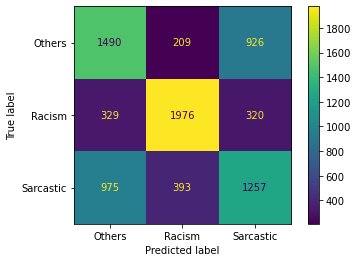

In [70]:
ConfusionMatrixDisplay(cm, display_labels = ['Others', 'Racism', 'Sarcastic'] ).plot()

In [71]:
%%time
myscore = make_scorer(roc_auc_score, multi_class='ovr',needs_proba=True)
#cross_validate(model_nb, X, y, cv = 5, scoring = myscore)

CPU times: user 24 µs, sys: 1e+03 ns, total: 25 µs
Wall time: 28.6 µs


In [72]:
#myscore = make_scorer(roc_auc_score, multi_class='ovr',needs_proba=True)
cross_val_score(model_nb, X, y, cv=10, scoring=myscore).mean()

0.7874658469624366

In [73]:
print('Cohen Kappa score:', cohen_kappa_score(originalclass, predictedclass))


Cohen Kappa score: 0.39961904761904765


### Support Vector Machine

In [74]:
from sklearn.svm import SVC
#%%time
model_svm = SVC(decision_function_shape= 'ovo')
#model_svm.fit(X, y)

Parameter tuning with SVM kernel = rbf

In [14]:
model_svm_rbf = SVC(kernel='rbf', decision_function_shape= 'ovo')
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid_svm_rbf = dict(C =Cs, gamma = gammas)


In [15]:
%%time
grid_svm_rbf = GridSearchCV(model_svm_rbf, param_grid_svm_rbf, scoring = 'accuracy', return_train_score = False)
grid_svm_rbf.fit(X,y)

CPU times: user 22min 55s, sys: 1.24 s, total: 22min 56s
Wall time: 22min 58s


GridSearchCV(estimator=SVC(decision_function_shape='ovo'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [16]:
print('Highest accuracy attained and the best parameters:')
print(grid_svm_rbf.best_score_)
print(grid_svm_rbf.best_params_)

Highest accuracy attained and the best parameters:
0.622984126984127
{'C': 10, 'gamma': 1}


In [8]:
print(grid_svm_rbf.best_estimator_.get_params())

{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [75]:
model_svm_rbf = SVC(kernel='rbf', decision_function_shape= 'ovo', C = 10, gamma = 1, probability= True)
#25/2/2021 best parameters for TF-IDF are different with BoW

In [76]:
%%time
originalclass.clear()
predictedclass.clear()
#Finding the average of the cross validated classificatin report
# Nested CV with parameter optimization
average_score = cross_val_score(model_svm_rbf, X, y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

              precision    recall  f1-score   support

      Others       0.54      0.68      0.60      2625
      Racism       0.87      0.78      0.82      2625
   Sarcastic       0.57      0.48      0.52      2625

    accuracy                           0.65      7875
   macro avg       0.66      0.65      0.65      7875
weighted avg       0.66      0.65      0.65      7875

CPU times: user 1h 4min 27s, sys: 15.2 s, total: 1h 4min 42s
Wall time: 1h 4min 43s


In [77]:
#from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(originalclass, predictedclass)
print(cm)
accuracy_score(originalclass, predictedclass)

[[1794  120  711]
 [ 346 2056  223]
 [1179  198 1248]]


0.6473650793650794

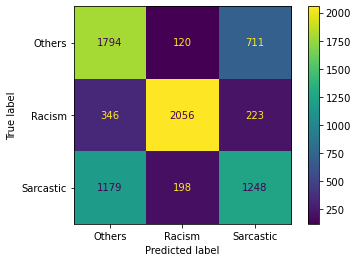

In [78]:
ConfusionMatrixDisplay(cm, display_labels = ['Others', 'Racism', 'Sarcastic'] ).plot()

In [4]:
%%time
myscore = make_scorer(roc_auc_score, multi_class='ovr',needs_proba=True)
cross_validate(model_svm_rbf, X, y, cv = 5, scoring = myscore)

CPU times: user 47min 36s, sys: 6.08 s, total: 47min 42s
Wall time: 47min 53s


{'fit_time': array([576.39992261, 604.72625017, 524.31138778, 527.81395721,
        528.11328626]),
 'score_time': array([23.87159371, 22.47144413, 21.61744738, 21.81396174, 22.13677478]),
 'test_score': array([0.71242691, 0.75045745, 0.69654301, 0.74570884, 0.73977022])}

In [79]:
%%time
myscore = make_scorer(roc_auc_score, multi_class='ovr',needs_proba=True)

cross_val_score(model_svm_rbf, X, y, cv=10, scoring=myscore).mean()

CPU times: user 1h 4min 2s, sys: 16.2 s, total: 1h 4min 18s
Wall time: 1h 4min 19s


0.8355561724530174

In [80]:
print('Cohen Kappa score:', cohen_kappa_score(originalclass, predictedclass))


Cohen Kappa score: 0.47104761904761905


### Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(n_jobs = 1)
#model_lr.fit(X_train, y_train)

In [41]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalties = ['l1', 'l2', 'elasticnet', 'none']
classes = ['auto', 'ovr', 'multinomial']
param_grid_logr = dict(C =Cs, penalty = penalties, multi_class =classes)


In [5]:
%%time
grid_logr = GridSearchCV(model_lr, param_grid_logr, scoring = 'accuracy', return_train_score = False)
grid_logr.fit(X,y)

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/lek/anaconda3/lib/python3.8/site-packages/s

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/lek/anaconda3/lib/python3.8/site-pa

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/lek/anaconda3/lib/python3.8/site-pa

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lek/anaconda3/lib/python3.8/site-pa

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/lek/anaconda3/lib/python3.8/site-packages/s

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solve

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/sta

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solve

CPU times: user 5min 49s, sys: 5.3 s, total: 5min 55s
Wall time: 3min 30s


GridSearchCV(estimator=LogisticRegression(n_jobs=1),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy')

In [6]:
print('Highest accuracy attained and the best parameters:')
print(grid_logr.best_score_)
print(grid_logr.best_params_)

Highest accuracy attained and the best parameters:
0.41193650793650793
{'C': 1000, 'multi_class': 'ovr', 'penalty': 'l2'}


In [82]:
model_lr = LogisticRegression(C=1000, penalty = 'l2', multi_class = 'ovr')


In [8]:
%%time
cross_val_score(model_lr, X, y, scoring = 'accuracy', cv=10).mean()

CPU times: user 37.1 s, sys: 741 ms, total: 37.8 s
Wall time: 19.8 s


0.5473097091699508

In [83]:
%%time
originalclass.clear()
predictedclass.clear()
#Finding the average of the cross validated classificatin report
# Nested CV with parameter optimization
average_score = cross_val_score(model_lr, X, y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

#24/2/2021 TFiDF, max features none
#25/2/2021 new parameters
#9/3/2021 Doc2Vec

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

              precision    recall  f1-score   support

      Others       0.55      0.54      0.54      2625
      Racism       0.75      0.82      0.78      2625
   Sarcastic       0.50      0.47      0.49      2625

    accuracy                           0.61      7875
   macro avg       0.60      0.61      0.60      7875
weighted avg       0.60      0.61      0.60      7875

CPU times: user 56.8 s, sys: 1.2 s, total: 58 s
Wall time: 49 s


/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(originalclass, predictedclass)
print(cm)
accuracy_score(originalclass, predictedclass)

[[1407  274  944]
 [ 199 2144  282]
 [ 949  435 1241]]


0.6085079365079366

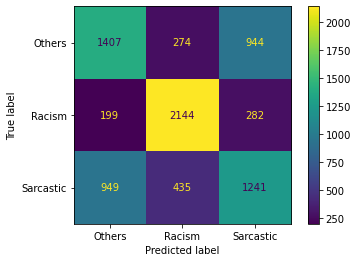

In [85]:
ConfusionMatrixDisplay(cm, display_labels = ['Others', 'Racism', 'Sarcastic'] ).plot()

In [10]:
%%time
myscore = make_scorer(roc_auc_score, multi_class='ovr',needs_proba=True)
cross_validate(model_lr, X, y, cv = 10, scoring = myscore)

CPU times: user 39.1 s, sys: 663 ms, total: 39.8 s
Wall time: 21 s


{'fit_time': array([2.18103766, 2.30101824, 2.33338404, 2.12727642, 2.24193525,
        1.88008356, 1.97904396, 1.80608082, 2.00850868, 1.98559546]),
 'score_time': array([0.01014853, 0.01006055, 0.01009059, 0.00997305, 0.00994515,
        0.01015949, 0.01040292, 0.01013279, 0.01022768, 0.0105648 ]),
 'test_score': array([0.70898909, 0.7134761 , 0.74906264, 0.72356055, 0.65864938,
        0.73478618, 0.77449411, 0.77531628, 0.8154774 , 0.74551228])}

In [86]:
%%time
cross_val_score(model_lr, X, y, cv=10, scoring=myscore).mean()

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

CPU times: user 51.2 s, sys: 865 ms, total: 52.1 s
Wall time: 41.3 s


/home/lek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7658102812250782

In [87]:
print('Cohen Kappa score:', cohen_kappa_score(originalclass, predictedclass))


Cohen Kappa score: 0.4127619047619048


### K Nearest Neighbor

In [88]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
#model_knn.fit(X_train, y_train)

In [50]:
k_range = list(range(1,21))
weight_options = ['uniform', 'distance']


In [13]:
param_grid = dict(n_neighbors = k_range, weights = weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'weights': ['uniform', 'distance']}


In [14]:
%%time
grid_knn = GridSearchCV(model_knn, param_grid, scoring = 'accuracy', return_train_score = False)
grid_knn.fit(X,y)

CPU times: user 5min 52s, sys: 430 ms, total: 5min 52s
Wall time: 5min 54s


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [15]:
print(grid_knn.best_score_)
print(grid_knn.best_params_)

0.5379047619047619
{'n_neighbors': 1, 'weights': 'uniform'}


- Best parameter for K Nearest Neighbor n_neighbors = 8, weights = 'distance'

###### Scoring for KNN model

In [89]:
model_knn = KNeighborsClassifier(n_neighbors=1, weights= 'uniform')

In [90]:
%%time
originalclass.clear()
predictedclass.clear()
#Finding the average of the cross validated classificatin report
# Nested CV with parameter optimization
average_score = cross_val_score(model_knn, X, y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 
#25/2/2021 new parameters

              precision    recall  f1-score   support

      Others       0.60      0.12      0.20      2625
      Racism       0.46      0.96      0.62      2625
   Sarcastic       0.56      0.39      0.46      2625

    accuracy                           0.49      7875
   macro avg       0.54      0.49      0.43      7875
weighted avg       0.54      0.49      0.43      7875

CPU times: user 1min 1s, sys: 884 ms, total: 1min 2s
Wall time: 1min 2s


In [91]:
#from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(originalclass, predictedclass)
print(cm)
accuracy_score(originalclass, predictedclass)

[[ 315 1575  735]
 [  20 2530   75]
 [ 186 1407 1032]]


0.4923174603174603

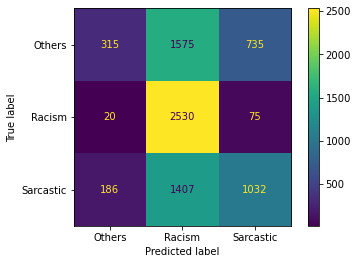

In [92]:
ConfusionMatrixDisplay(cm, display_labels = ['Others', 'Racism', 'Sarcastic'] ).plot()

In [16]:
%%time
myscore = make_scorer(roc_auc_score, multi_class='ovr',needs_proba=True)
cross_validate(model_knn, X, y, cv = 10, scoring = myscore)

CPU times: user 3min 40s, sys: 813 ms, total: 3min 40s
Wall time: 3min 41s


{'fit_time': array([1.66733313, 1.62944937, 1.65505242, 1.54289007, 1.72580242,
        1.57315373, 1.57537103, 2.00563931, 1.85303235, 1.78818941]),
 'score_time': array([20.05310607, 19.63426828, 20.49684882, 20.77379155, 20.15468574,
        20.4667027 , 20.69690585, 20.97836089, 20.08178425, 20.66112137]),
 'test_score': array([0.66401808, 0.65086141, 0.68819474, 0.67179324, 0.62150722,
        0.68150618, 0.75044008, 0.74308146, 0.7610312 , 0.71740667])}

In [93]:
%%time
cross_val_score(model_knn, X, y, cv=10, scoring=myscore).mean()

CPU times: user 59.4 s, sys: 776 ms, total: 1min
Wall time: 1min


0.6192693199707537

In [94]:
print('Cohen Kappa score:', cohen_kappa_score(originalclass, predictedclass))


Cohen Kappa score: 0.2384761904761905


### Decision Tree Classification

In [95]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
#model_dt.fit(X_train, y_train)

In [22]:
criterions = ["gini", "entropy"]
splitters = ["best", "random"]
max_features_option = ["auto", "sqrt", "log2", None]


In [23]:
param_grid_dt = dict(criterion = criterions, splitter = splitters, max_features = max_features_option)
print(param_grid_dt)

{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2', None]}


In [24]:
%%time
grid_dt = GridSearchCV(model_dt, param_grid_dt, scoring = 'accuracy', return_train_score = False)
grid_dt.fit(X,y)

CPU times: user 1min 41s, sys: 135 ms, total: 1min 41s
Wall time: 1min 42s


GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [25]:
print(grid_dt.best_score_)
print(grid_dt.best_params_)

0.46920634920634924
{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'random'}


In [96]:
model_dt = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', max_features = 'sqrt')


In [97]:
%%time
originalclass.clear()
predictedclass.clear()
#Finding the average of the cross validated classificatin report
# Nested CV with parameter optimization
average_score = cross_val_score(model_dt, X, y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 

              precision    recall  f1-score   support

      Others       0.44      0.42      0.43      2625
      Racism       0.58      0.60      0.59      2625
   Sarcastic       0.40      0.40      0.40      2625

    accuracy                           0.47      7875
   macro avg       0.47      0.47      0.47      7875
weighted avg       0.47      0.47      0.47      7875

CPU times: user 3.57 s, sys: 8.01 ms, total: 3.58 s
Wall time: 3.58 s


In [98]:
#from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(originalclass, predictedclass)
print(cm)
accuracy_score(originalclass, predictedclass)

[[1105  551  969]
 [ 461 1573  591]
 [ 968  597 1060]]


0.4746666666666667

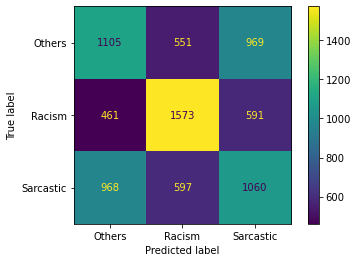

In [99]:
ConfusionMatrixDisplay(cm, display_labels = ['Others', 'Racism', 'Sarcastic'] ).plot()

In [20]:
%%time
myscore = make_scorer(roc_auc_score, multi_class='ovr',needs_proba=True)
cross_validate(model_dt, X, y, cv = 10, scoring = myscore)

CPU times: user 59.5 s, sys: 260 ms, total: 59.8 s
Wall time: 59.9 s


{'fit_time': array([6.00322342, 5.96962905, 5.68705082, 5.43955851, 5.97839713,
        5.80089402, 6.50863242, 6.11269832, 6.12801814, 6.10904241]),
 'score_time': array([0.00989199, 0.00983763, 0.00933242, 0.00917816, 0.00901699,
        0.00947976, 0.00945187, 0.00952148, 0.00954723, 0.01263714]),
 'test_score': array([0.61793554, 0.5990578 , 0.60910953, 0.62522632, 0.58746122,
        0.60868555, 0.69378359, 0.65802528, 0.68355043, 0.66801814])}

In [100]:
%%time
cross_val_score(model_dt, X, y, cv=10, scoring=myscore).mean()

CPU times: user 3.61 s, sys: 3.97 ms, total: 3.61 s
Wall time: 3.61 s


0.6110036373453782

In [101]:
print('Cohen Kappa score:', cohen_kappa_score(originalclass, predictedclass))


Cohen Kappa score: 0.21199999999999997


### Random Forest Classification

In [102]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
#model_rf.fit(X_train, y_train)

In [33]:
n_estimators_range =[100, 200, 500]
criterions = ["gini", "entropy"]

In [34]:
param_grid_rf = dict(criterion = criterions, n_estimators = n_estimators_range)
print(param_grid_rf)

{'criterion': ['gini', 'entropy'], 'n_estimators': [100, 200, 500]}


In [35]:
%%time
grid_rf = GridSearchCV(model_rf, param_grid_rf, scoring = 'accuracy', return_train_score = False)
grid_rf.fit(X,y)

CPU times: user 39min 31s, sys: 2.07 s, total: 39min 33s
Wall time: 39min 36s


GridSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=500),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [36]:
print(grid_rf.best_score_)
print(grid_rf.best_params_)

0.5575873015873016
{'criterion': 'entropy', 'n_estimators': 500}


In [103]:
model_rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 500)

In [104]:
%%time
originalclass.clear()
predictedclass.clear()
#Finding the average of the cross validated classificatin report
# Nested CV with parameter optimization
average_score = cross_val_score(model_rf, X, y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

# Average values in classification report for all folds in a K-fold Cross-validation  
print(classification_report(originalclass, predictedclass)) 
#25/2/2021 new parameters

              precision    recall  f1-score   support

      Others       0.57      0.61      0.59      2625
      Racism       0.77      0.84      0.81      2625
   Sarcastic       0.54      0.45      0.49      2625

    accuracy                           0.64      7875
   macro avg       0.63      0.64      0.63      7875
weighted avg       0.63      0.64      0.63      7875

CPU times: user 15min 26s, sys: 639 ms, total: 15min 27s
Wall time: 15min 29s


In [105]:
#from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(originalclass, predictedclass)
print(cm)
accuracy_score(originalclass, predictedclass)

[[1610  239  776]
 [ 183 2212  230]
 [1029  417 1179]]


0.6350476190476191

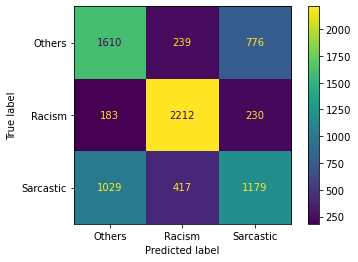

In [106]:
ConfusionMatrixDisplay(cm, display_labels = ['Others', 'Racism', 'Sarcastic'] ).plot()

In [24]:
%%time
myscore = make_scorer(roc_auc_score, multi_class='ovr',needs_proba=True)
cross_validate(model_rf, X, y, cv = 10, scoring = myscore)

CPU times: user 5min 19s, sys: 743 ms, total: 5min 19s
Wall time: 5min 19s


{'fit_time': array([31.84663749, 31.91554093, 36.14184952, 32.75341201, 30.05870438,
        30.59206223, 31.48473239, 31.3617816 , 31.71793747, 30.13152003]),
 'score_time': array([0.17494392, 0.18957281, 0.17130446, 0.16314483, 0.16281676,
        0.1686728 , 0.18801236, 0.18522954, 0.1895225 , 0.20227742]),
 'test_score': array([0.71560047, 0.69811234, 0.74771547, 0.72054578, 0.65417202,
        0.73787984, 0.81524442, 0.81521755, 0.83809699, 0.78669963])}

In [107]:
%%time
cross_val_score(model_rf, X, y, cv=10, scoring=myscore).mean()

CPU times: user 15min 32s, sys: 663 ms, total: 15min 33s
Wall time: 15min 34s


0.8217358172324939

In [108]:
print('Cohen Kappa score:', cohen_kappa_score(originalclass, predictedclass))


Cohen Kappa score: 0.4525714285714286


In [50]:
#pip install dill

     |████████████████████████████████| 81 kB 247 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


----

In [53]:
%%time
import dill
dill.dump_session('Twitter Racism_3 label.db')

CPU times: user 7.21 s, sys: 806 ms, total: 8.02 s
Wall time: 11.5 s
